Vorab: conda install gensim

In [1]:
import gensim.downloader

In [3]:
model = gensim.downloader.load("glove-wiki-gigaword-50")

In [7]:
print(model["king"])
print(len(model["king"]))

[ 0.50451   0.68607  -0.59517  -0.022801  0.60046  -0.13498  -0.08813
  0.47377  -0.61798  -0.31012  -0.076666  1.493    -0.034189 -0.98173
  0.68229   0.81722  -0.51874  -0.31503  -0.55809   0.66421   0.1961
 -0.13495  -0.11476  -0.30344   0.41177  -2.223    -1.0756   -1.0783
 -0.34354   0.33505   1.9927   -0.04234  -0.64319   0.71125   0.49159
  0.16754   0.34344  -0.25663  -0.8523    0.1661    0.40102   1.1685
 -1.0137   -0.21585  -0.15155   0.78321  -0.91241  -1.6106   -0.64426
 -0.51042 ]
50


In [9]:
len(model.key_to_index)

400000

In [51]:
model["king"]
print(len(model["king"]))

50


In [13]:
print(len(model.key_to_index))
model.key_to_index
# model.index_to_key

400000


{'the': 0,
 ',': 1,
 '.': 2,
 'of': 3,
 'to': 4,
 'and': 5,
 'in': 6,
 'a': 7,
 '"': 8,
 "'s": 9,
 'for': 10,
 '-': 11,
 'that': 12,
 'on': 13,
 'is': 14,
 'was': 15,
 'said': 16,
 'with': 17,
 'he': 18,
 'as': 19,
 'it': 20,
 'by': 21,
 'at': 22,
 '(': 23,
 ')': 24,
 'from': 25,
 'his': 26,
 "''": 27,
 '``': 28,
 'an': 29,
 'be': 30,
 'has': 31,
 'are': 32,
 'have': 33,
 'but': 34,
 'were': 35,
 'not': 36,
 'this': 37,
 'who': 38,
 'they': 39,
 'had': 40,
 'i': 41,
 'which': 42,
 'will': 43,
 'their': 44,
 ':': 45,
 'or': 46,
 'its': 47,
 'one': 48,
 'after': 49,
 'new': 50,
 'been': 51,
 'also': 52,
 'we': 53,
 'would': 54,
 'two': 55,
 'more': 56,
 "'": 57,
 'first': 58,
 'about': 59,
 'up': 60,
 'when': 61,
 'year': 62,
 'there': 63,
 'all': 64,
 '--': 65,
 'out': 66,
 'she': 67,
 'other': 68,
 'people': 69,
 "n't": 70,
 'her': 71,
 'percent': 72,
 'than': 73,
 'over': 74,
 'into': 75,
 'last': 76,
 'some': 77,
 'government': 78,
 'time': 79,
 '$': 80,
 'you': 81,
 'years': 82,
 'i

In [10]:
model.similarity("king", "queen")

0.7839043

In [12]:
model.most_similar("car")

[('truck', 0.92085862159729),
 ('cars', 0.8870189785957336),
 ('vehicle', 0.8833683133125305),
 ('driver', 0.8464018702507019),
 ('driving', 0.8384189009666443),
 ('bus', 0.8210511803627014),
 ('vehicles', 0.8174993395805359),
 ('parked', 0.7902189493179321),
 ('motorcycle', 0.7866503000259399),
 ('taxi', 0.7833929657936096)]

In [16]:
model.most_similar(model["germany"] - model["france"] + model["paris"])

[('berlin', 0.9181488752365112),
 ('frankfurt', 0.8184096217155457),
 ('munich', 0.8120747804641724),
 ('vienna', 0.8101339936256409),
 ('germany', 0.804895281791687),
 ('hamburg', 0.797433614730835),
 ('stockholm', 0.7717639803886414),
 ('warsaw', 0.7688193917274475),
 ('budapest', 0.7663007974624634),
 ('prague', 0.7654389142990112)]

In [18]:
model.most_similar(model["germany"] - model["japan"] + model["sushi"])

[('gourmet', 0.6915086507797241),
 ('fries', 0.6719846725463867),
 ('sausages', 0.6515130400657654),
 ('hamburger', 0.6382427215576172),
 ('deli', 0.6339925527572632),
 ('braise', 0.6236903071403503),
 ('sushi', 0.6191727519035339),
 ('chef', 0.6177273988723755),
 ('hamburgers', 0.6171662211418152),
 ('burgers', 0.6170258522033691)]

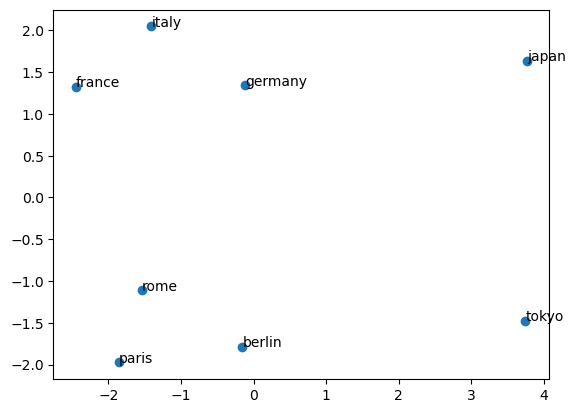

In [39]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

words = ["germany", "france", "berlin", "paris", "italy", "rome", "japan", "tokyo"]

projections = PCA(n_components=2).fit_transform(model[words])

fig, ax = plt.subplots()
ax.scatter(projections[:, 0], projections[:, 1])
for word, (x, y) in zip(words, projections):
    ax.text(x, y, word)